### Implementing simple Chatbot Using LangGraph

In [3]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv('GROQ_API_KEY')
# os.environ["GROQ_API_KEY"] , os.environ["GOOGLE_API_KEY"]

In [8]:
import google.generativeai as genai

# Configure with your API key
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

# Initialize the model
model = genai.GenerativeModel('gemini-2.5-flash')

# Generate content
response = model.generate_content("Explain quantum computing in simple terms")
print(response.text)

Imagine your regular computer uses bits, which are like light switches that can be either **ON (1)** or **OFF (0)**. At any given moment, a classical bit is definitively one or the other.

Quantum computers work differently, using something called **qubits**. Here's the simple breakdown:

1.  **Superposition (Being ON and OFF at the same time!):**
    *   Instead of being just ON or OFF, a qubit can be **both ON and OFF simultaneously**. Think of it like a spinning coin in the air – it's neither heads nor tails until it lands.
    *   This means a single qubit can hold a lot more information than a classical bit. If you have multiple qubits, the number of possibilities they can represent simultaneously grows exponentially. Two qubits can be 00, 01, 10, and 11 *all at once*.

2.  **Entanglement (Linked Destiny):**
    *   This is where things get really weird and powerful. Entanglement means that two or more qubits become **linked together in such a way that they share the same fate**, 

In [12]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-20b")
llm_groq.invoke("Hey I am Rohit and i like to play cricket")

AIMessage(content='Hey Rohit! 👋🏼 It’s great to meet another cricket fan. How long have you been playing? Do you have a favorite position (batsman, bowler, all‑rounder) or a player you look up to? Whether you’re into the IPL, international cricket, or just backyard games, I’d love to hear more about your love for the sport!', additional_kwargs={'reasoning_content': 'We need to respond to user: "Hey I am Rohit and i like to play cricket". The user is just greeting and stating interest. We can respond warmly, ask about their cricket experience, favorite player, etc. We should maintain friendly tone. No policy conflict. Let\'s comply.'}, response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 82, 'total_tokens': 228, 'completion_time': 0.145732898, 'prompt_time': 0.00451855, 'queue_time': 0.04234766, 'total_time': 0.150251448}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_3d587a02fb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': N

### We Will start With Creating Nodes

In [13]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

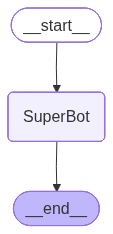

In [14]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Rohit And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Rohit And I like cricket', additional_kwargs={}, response_metadata={}, id='2c09cac7-3e4d-4072-be35-dea1b496f30d'),
  AIMessage(content="Hey Rohit! 👋 Great to meet you. Cricket’s a fantastic sport—so many exciting moments. Do you play it, follow a particular team, or have a favorite player? I'd love to hear more about what you love about the game!", additional_kwargs={'reasoning_content': 'The user says: "Hi,My name is Rohit And I like cricket". They just introduced themselves. The user might want a response. We should respond warmly, maybe ask about cricket or something. The user is named Rohit. They like cricket. We can respond: "Hello Rohit! Great to meet you. What do you like about cricket? Do you play or follow any teams?" We should keep the conversation friendly. The user might want to continue. We can ask about their favorite team or player. Let\'s respond accordingly.'}, response_metadata={'token_usage': {'completion_tokens': 170

#### Streaming The responses

In [18]:
for event in graph_builder.stream({"messages":"Hello My name is Rohit"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello Rohit! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hello My name is Rohit". We should respond politely, maybe ask how we can help. The user hasn\'t asked a question yet. We need to greet them, maybe ask what they need. We\'ll keep it friendly.'}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 77, 'total_tokens': 148, 'completion_time': 0.070300514, 'prompt_time': 0.005559272, 'queue_time': 0.047373984, 'total_time': 0.075859786}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_3d587a02fb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2a5da92d-117f-405a-a608-69146875a359-0', usage_metadata={'input_tokens': 77, 'output_tokens': 71, 'total_tokens': 148})]}}
